## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

## Query for the data and create a numpy array

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil.parser
import pg8000
from pandas import DataFrame
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [39]:
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", user='dot_student', password='qgis', database='training')
cursor = conn.cursor()

In [40]:
cursor.execute("select column_name from information_schema.columns where table_name='winequality'")
column_list = []
for row in cursor.fetchall():
    column_list.append(row[0])
column_list

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'color']

In [5]:
database=cursor.execute("SELECT * FROM winequality")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_sql("SELECT * FROM winequality", conn)

In [6]:
df.head()

,b'fixed_acidity',b'volatile_acidity',b'citric_acid',b'residual_sugar',b'chlorides',b'free_sulfur_dioxide',b'total_sulfur_dioxide',b'density',b'ph',b'sulphates',b'alcohol',b'color'
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W


In [12]:
df.columns

Index([       b'fixed_acidity',     b'volatile_acidity',
                b'citric_acid',       b'residual_sugar',
                  b'chlorides',  b'free_sulfur_dioxide',
       b'total_sulfur_dioxide',              b'density',
                         b'ph',            b'sulphates',
                    b'alcohol',                b'color'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
b'fixed_acidity'           6497 non-null float64
b'volatile_acidity'        6497 non-null float64
b'citric_acid'             6497 non-null float64
b'residual_sugar'          6497 non-null float64
b'chlorides'               6497 non-null float64
b'free_sulfur_dioxide'     6497 non-null float64
b'total_sulfur_dioxide'    6497 non-null float64
b'density'                 6497 non-null float64
b'ph'                      6497 non-null float64
b'sulphates'               6497 non-null float64
b'alcohol'                 6497 non-null float64
b'color'                   6497 non-null object
dtypes: float64(11), object(1)
memory usage: 583.8+ KB


## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [9]:
numpyMatrix = df.as_matrix()
numpyMatrix

array([[7.0, 0.27, 0.36, ..., 0.45, 8.8, 'W'],
       [6.3, 0.3, 0.34, ..., 0.49, 9.5, 'W'],
       [8.1, 0.28, 0.4, ..., 0.44, 10.1, 'W'],
       ..., 
       [6.3, 0.51, 0.13, ..., 0.75, 11.0, 'R'],
       [5.9, 0.645, 0.12, ..., 0.71, 10.2, 'R'],
       [6.0, 0.31, 0.47, ..., 0.66, 11.0, 'R']], dtype=object)

In [13]:
x = numpyMatrix[:,:11]
x

array([[7.0, 0.27, 0.36, ..., 3.0, 0.45, 8.8],
       [6.3, 0.3, 0.34, ..., 3.3, 0.49, 9.5],
       [8.1, 0.28, 0.4, ..., 3.26, 0.44, 10.1],
       ..., 
       [6.3, 0.51, 0.13, ..., 3.42, 0.75, 11.0],
       [5.9, 0.645, 0.12, ..., 3.57, 0.71, 10.2],
       [6.0, 0.31, 0.47, ..., 3.39, 0.66, 11.0]], dtype=object)

In [14]:
y = numpyMatrix[:,11:]
y

array([['W'],
       ['W'],
       ['W'],
       ..., 
       ['R'],
       ['R'],
       ['R']], dtype=object)

## Create a decision tree with the data

In [17]:
dt = tree.DecisionTreeClassifier()

In [18]:
dt = dt.fit(x,y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,train_size=0.75)

In [21]:
dt = dt.fit(x_train,y_train)

In [23]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [24]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.984 

Classification report
             precision    recall  f1-score   support

          R       0.96      0.97      0.97       396
          W       0.99      0.99      0.99      1229

avg / total       0.98      0.98      0.98      1625
 

Confusion matrix
[[ 386   10]
 [  16 1213]] 



In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True color')
    plt.xlabel('Predicted color')

In [27]:
y_pred = dt.fit(x_train, y_train).predict(x_test)

Confusion matrix, without normalization
[[ 384   12]
 [  15 1214]]


NameError: name 'iris' is not defined

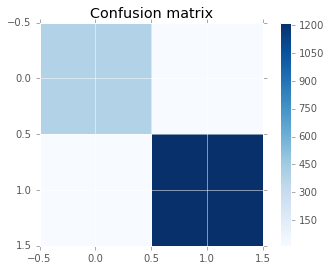

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## Run 10-fold cross validation on the model

In [29]:
from sklearn.cross_validation import cross_val_score

In [44]:
x = numpyMatrix[:,:11]
x

array([[7.0, 0.27, 0.36, ..., 3.0, 0.45, 8.8],
       [6.3, 0.3, 0.34, ..., 3.3, 0.49, 9.5],
       [8.1, 0.28, 0.4, ..., 3.26, 0.44, 10.1],
       ..., 
       [6.3, 0.51, 0.13, ..., 3.42, 0.75, 11.0],
       [5.9, 0.645, 0.12, ..., 3.57, 0.71, 10.2],
       [6.0, 0.31, 0.47, ..., 3.39, 0.66, 11.0]], dtype=object)

In [45]:
y = numpyMatrix[:,11]
y

array(['W', 'W', 'W', ..., 'R', 'R', 'R'], dtype=object)

In [46]:
scores = cross_val_score(dt,x,y,cv=10)

In [47]:
scores

array([ 0.98,  0.98,  0.98,  0.98,  0.98,  0.98,  0.98,  0.97,  0.99,  0.98])

In [48]:
np.mean(scores)

0.98060755314992609

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

In [43]:
cursor.execute("Select * FROM winequality")
colnames = [desc[0] for desc in cursor.description]
colnames

[b'fixed_acidity',
 b'volatile_acidity',
 b'citric_acid',
 b'residual_sugar',
 b'chlorides',
 b'free_sulfur_dioxide',
 b'total_sulfur_dioxide',
 b'density',
 b'ph',
 b'sulphates',
 b'alcohol',
 b'color']

(-5, 10)

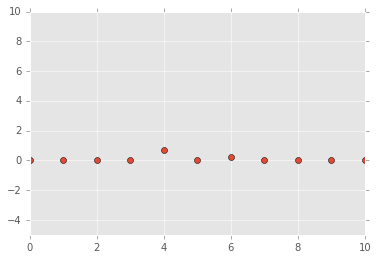

In [50]:
plt.plot(dt.feature_importances_,'o')
plt.ylim(-5,10)
plt.ylim(-5,10)